## Datasets

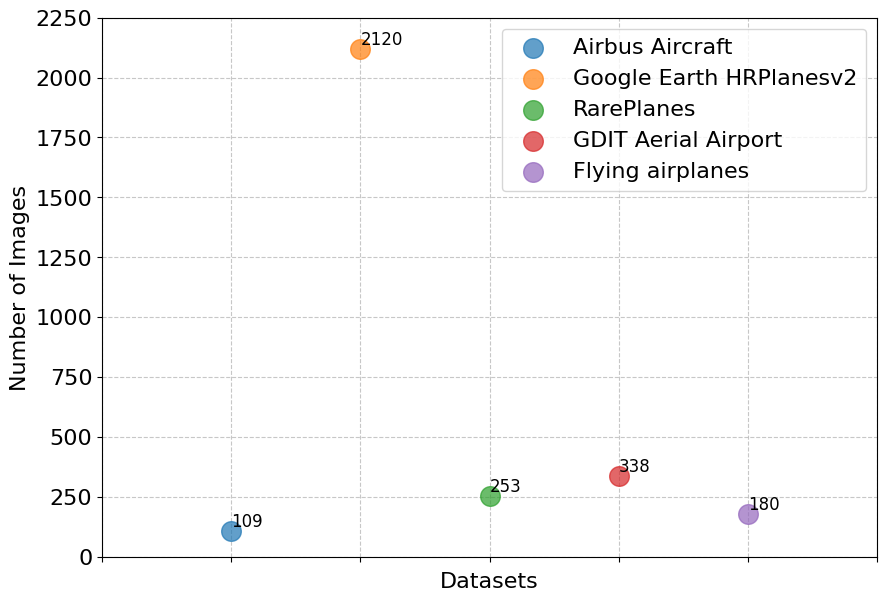

In [8]:
import matplotlib.pyplot as plt

datasets = ["Airbus Aircraft", "Google Earth HRPlanesv2", "RarePlanes", "GDIT Aerial Airport", "Flying airplanes"]
num_images = [109, 2120, 253, 338, 180]

fig, ax = plt.subplots(figsize=(10, 7))
for i, dataset in enumerate(datasets):
    ax.scatter(i, num_images[i], s=200, label=dataset, alpha=0.7)

    ax.text(i, num_images[i], str(num_images[i]), ha='left', va='bottom', fontsize=12)

ax.set_ylabel("Number of Images", fontsize=16)
ax.set_xlabel("Datasets", fontsize=16)

legend = ax.legend(fontsize=16)

ax.set_xticks(range(-1, len(datasets)+1))
ax.set_xticklabels([])

ax.set_yticks(range(0, 2251, 250))
ax.tick_params(axis='both', labelsize=16) 

ax.grid(True, linestyle='--', alpha=0.7, which='both')
ax.set_axisbelow(True)  

plt.savefig("dataset_overview.pdf")

plt.show()

# Resulting curves

You can download the weights and the tensorboard curve results from [Drive](https://drive.google.com/file/d/13aXBJcxKXjqyq7ycAg4LIe8TEmrX-kxa/view?usp=sharing)

```python
pip install gdown

# to upgrade
pip install --upgrade gdown
```

In [1]:
# Download the file
!gdown https://drive.google.com/file/d/13aXBJcxKXjqyq7ycAg4LIe8TEmrX-kxa/view?usp=sharing

# Unzip it in the home folder
%unzip output_tensor.zip

/bin/bash: gdown: command not found


UsageError: Line magic function `%unzip` not found.


You can open tensorboard using the following command:

```python
tensorboard --logdir output_tensor/
```

In [17]:
import os
import pandas as pd

def best_mAP(folder_path):
    """
    Function to find the best mAP value in each csv file
    """
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            df = pd.read_csv(os.path.join(folder_path, filename))

            mAP_values = df['Value']

            best_mAP_value = max(mAP_values)
            best_mAP_step = df[df['Value'] == best_mAP_value]['Step'].values[0]

            print(f"In file {filename}, the best mAP value of {best_mAP_value} is obtained at step {best_mAP_step}.")

folder_path = "curve_results/bbox_mAP50/"
best_mAP("curve_results/bbox_mAP50/")
print("-----------------------------------------------------------")
best_mAP("curve_results/bbox_mAP/")


In file RTMdet.csv, the best mAP value of 0.9890000224113464 is obtained at step 240.
In file Yolo8.csv, the best mAP value of 0.99236 is obtained at step 395.
In file CenterNet.csv, the best mAP value of 0.9869999885559082 is obtained at step 421.
In file SSD.csv, the best mAP value of 0.8600000143051147 is obtained at step 74.
In file Faster-RCNN.csv, the best mAP value of 0.9860000014305116 is obtained at step 8.
In file Yolo5.csv, the best mAP value of 0.99471 is obtained at step 150.
In file DETR.csv, the best mAP value of 0.9850000143051147 is obtained at step 425.
In file RetinaNet.csv, the best mAP value of 0.9700000286102296 is obtained at step 230.
-----------------------------------------------------------
In file RTMdet.csv, the best mAP value of 0.8379999995231628 is obtained at step 340.
In file Yolo8.csv, the best mAP value of 0.8372 is obtained at step 492.
In file CenterNet.csv, the best mAP value of 0.8259999752044678 is obtained at step 439.
In file SSD.csv, the best

In [1]:
# import the plot function
from utils import plot_curves

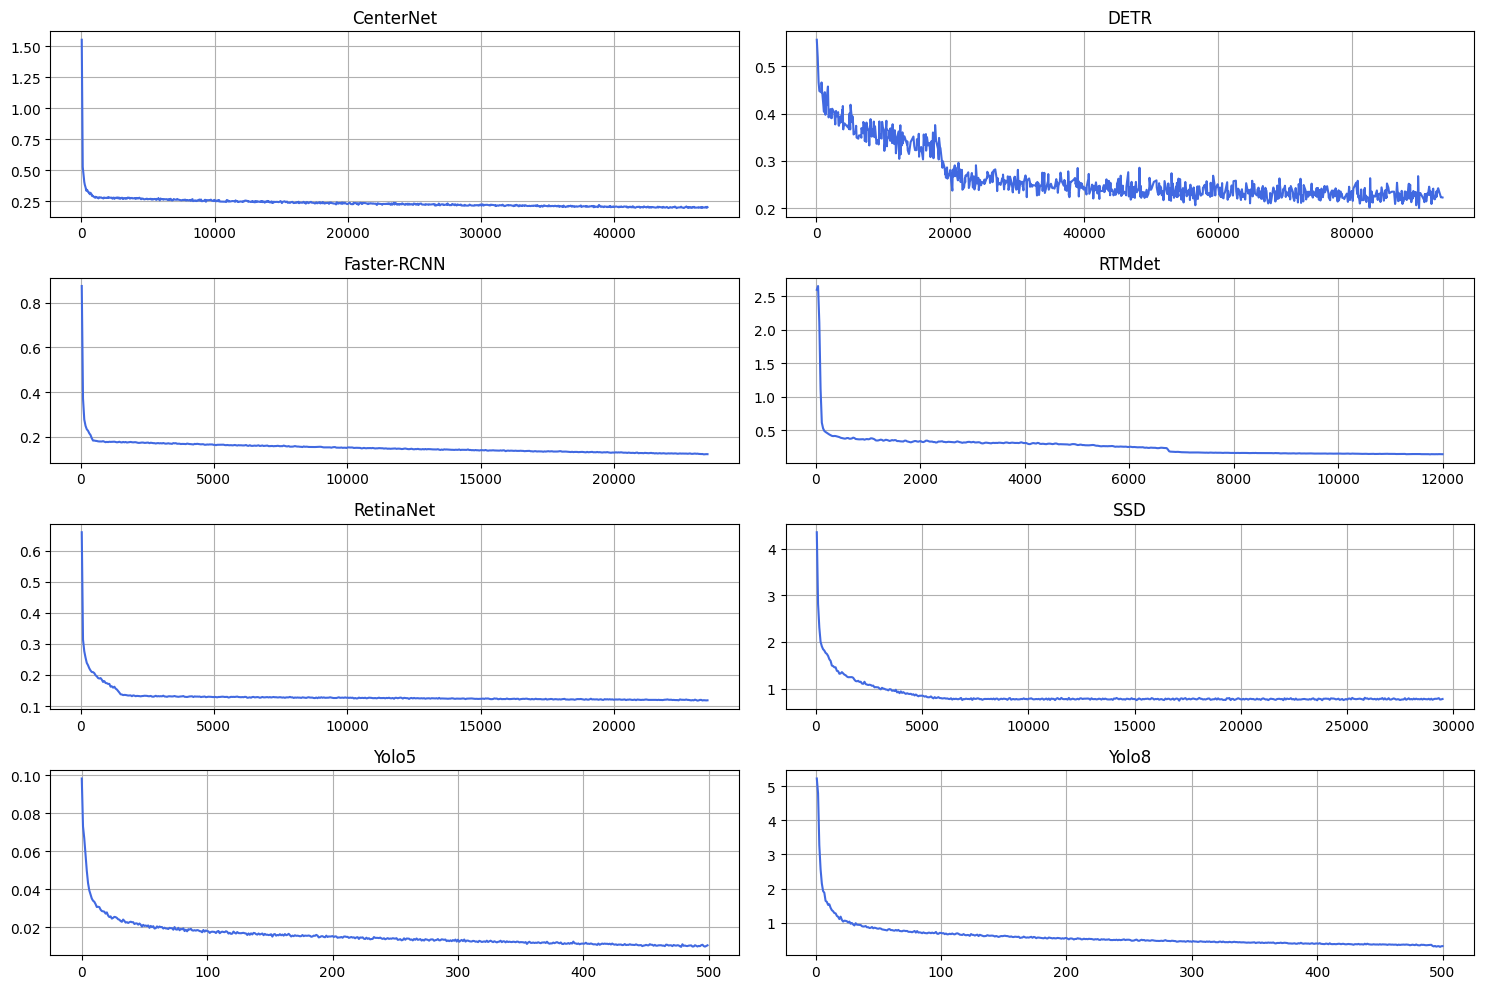

In [2]:

directory_path = 'curve_results/loss'
plot_curves(directory_path, color='royalblue')

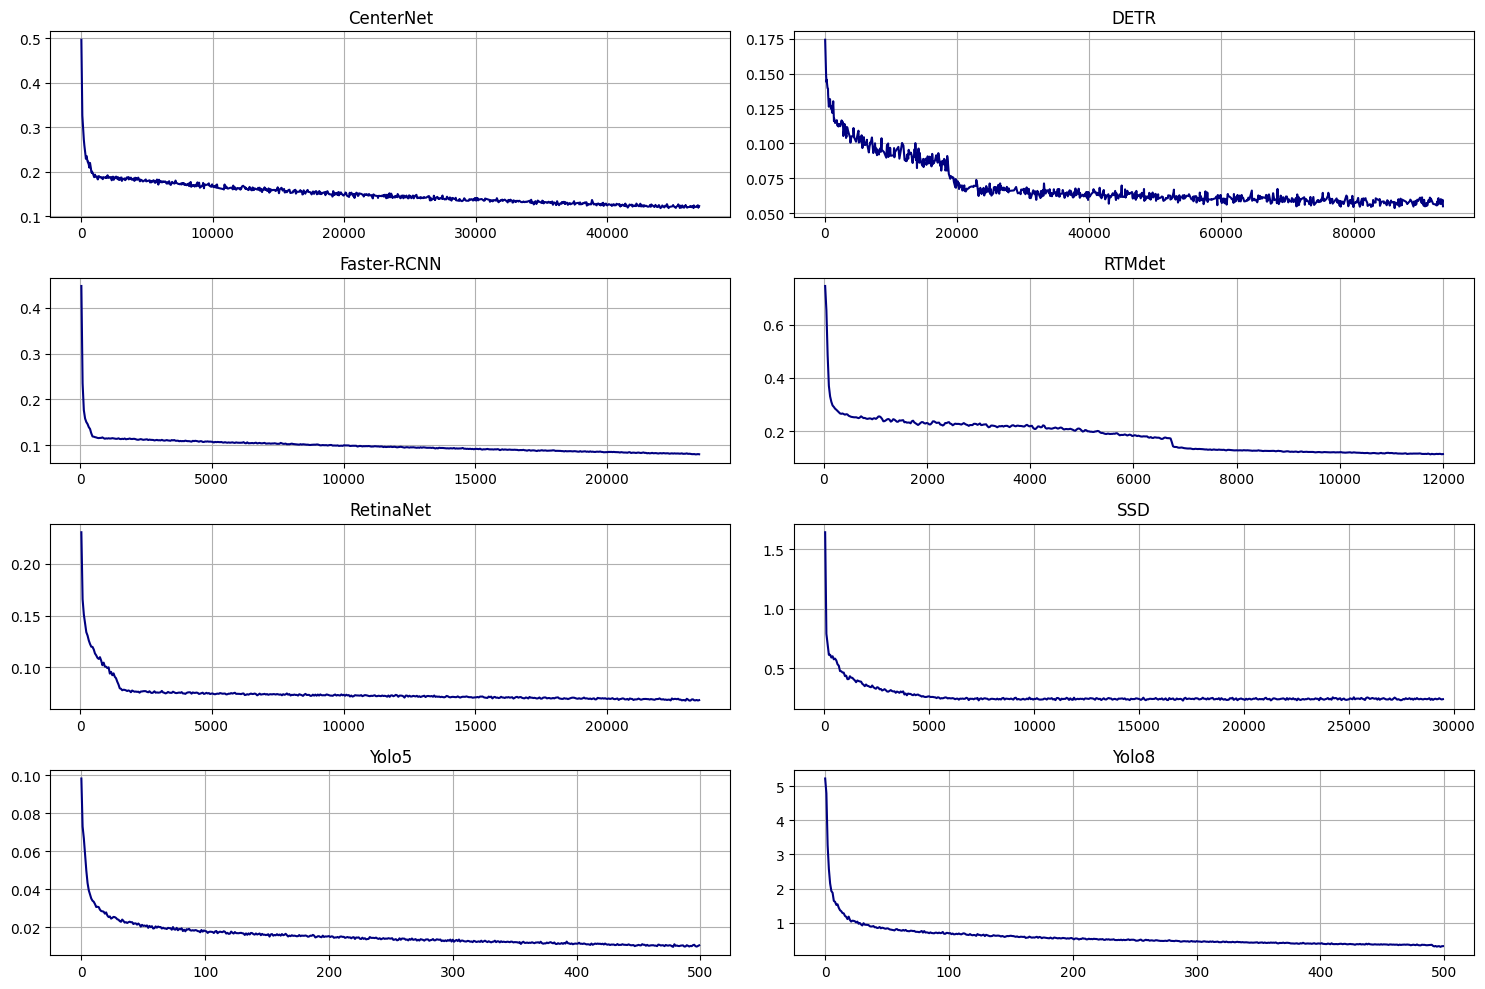

In [3]:
directory = 'curve_results/loss_bbox'
plot_curves(directory, color='navy')

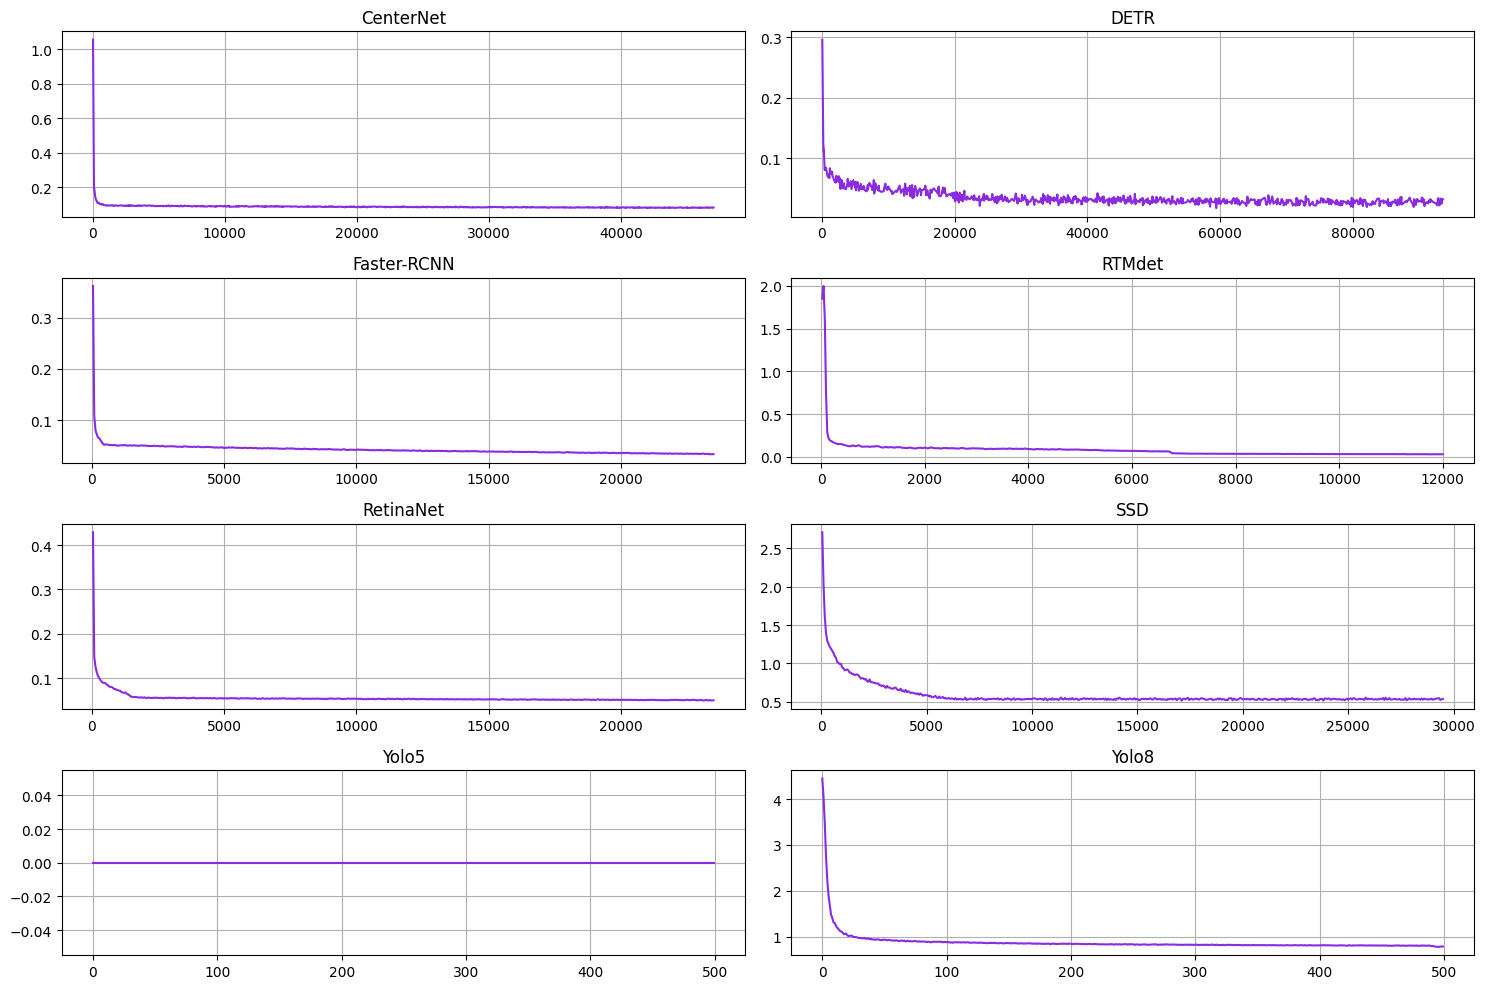

In [4]:
directory = 'curve_results/loss_cls'
plot_curves(directory, color='blueviolet')

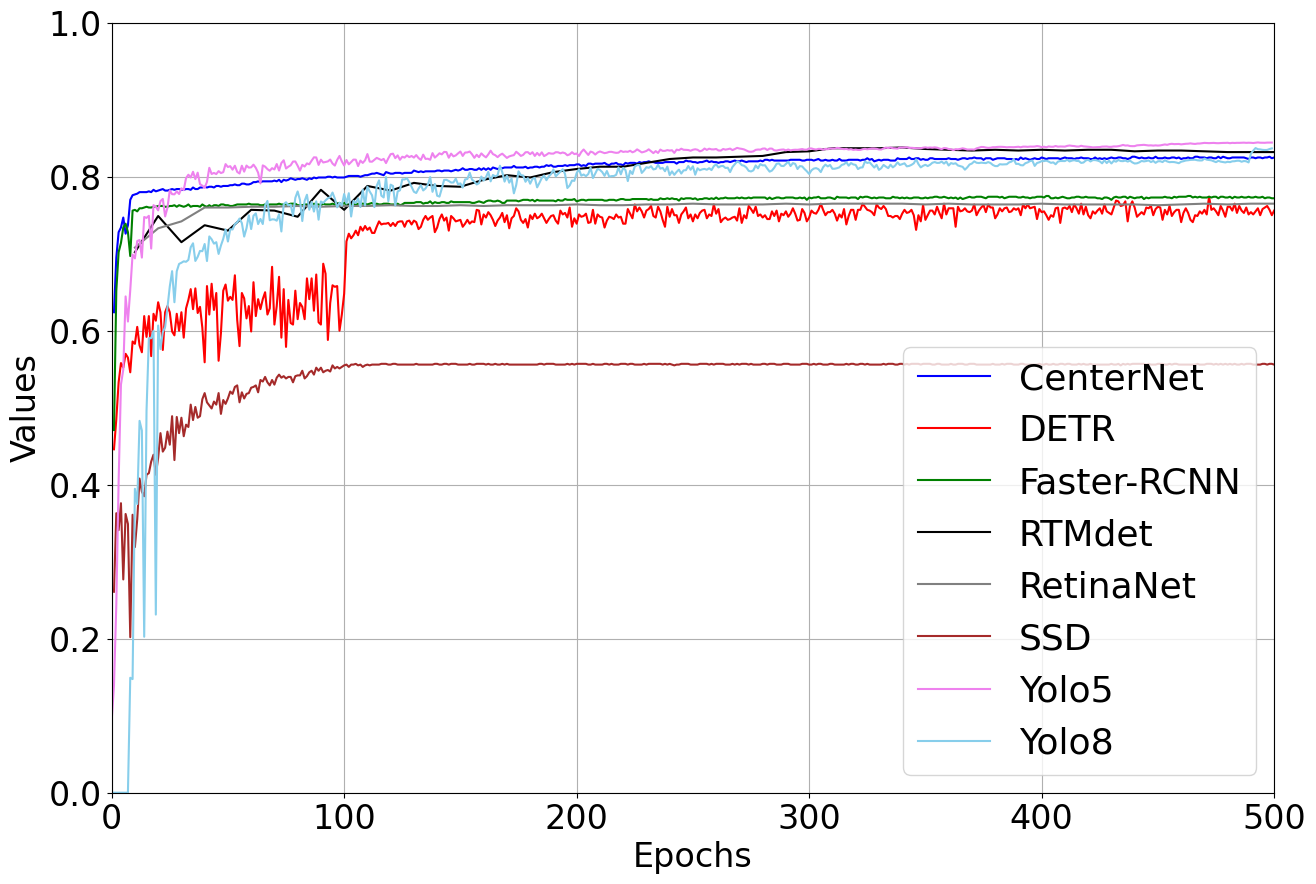

In [6]:
directory = 'curve_results/bbox_mAP'
plot_curves(directory, separate_subplots=False)

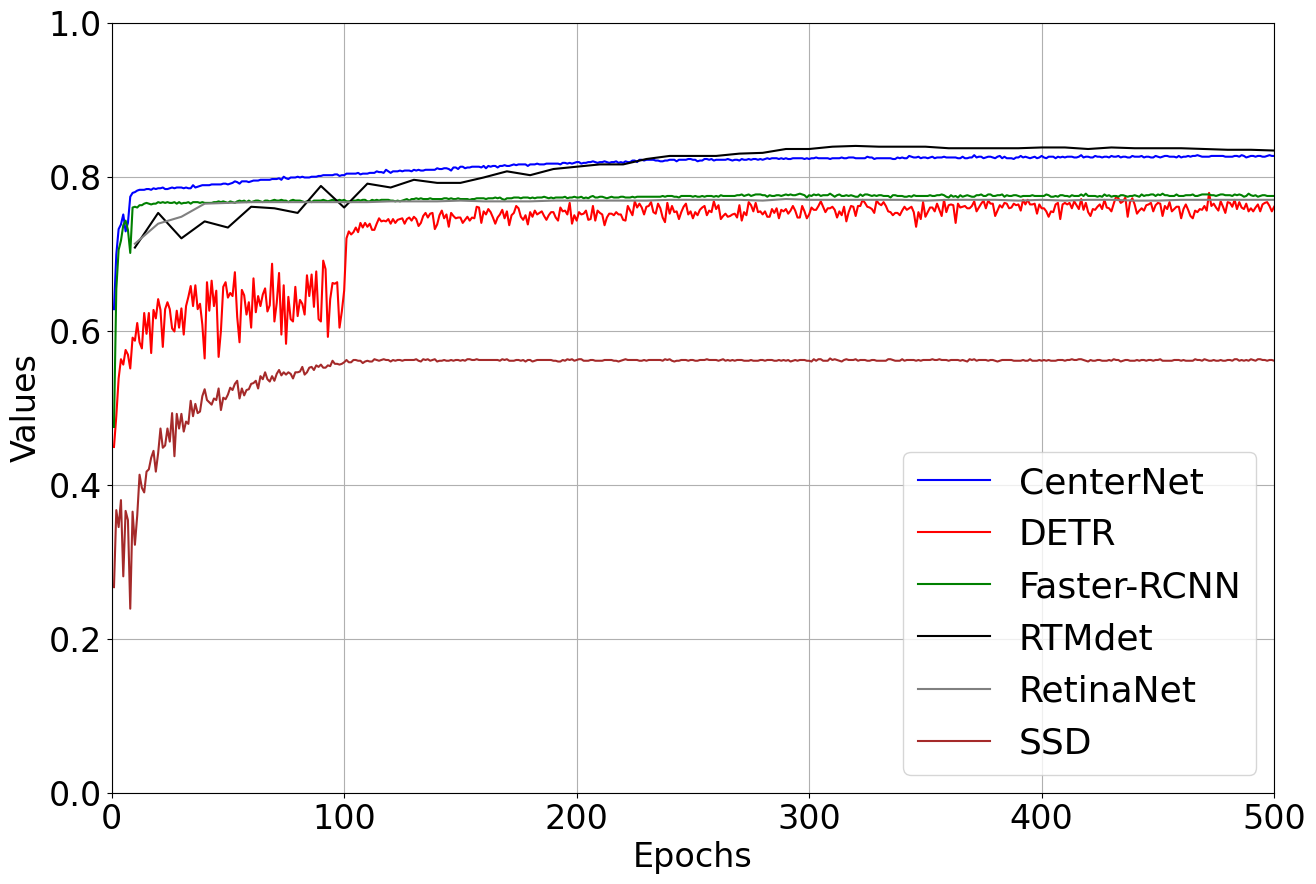

In [3]:
directory = 'curve_results/bbox_mAP_l'
plot_curves(directory, separate_subplots=False)

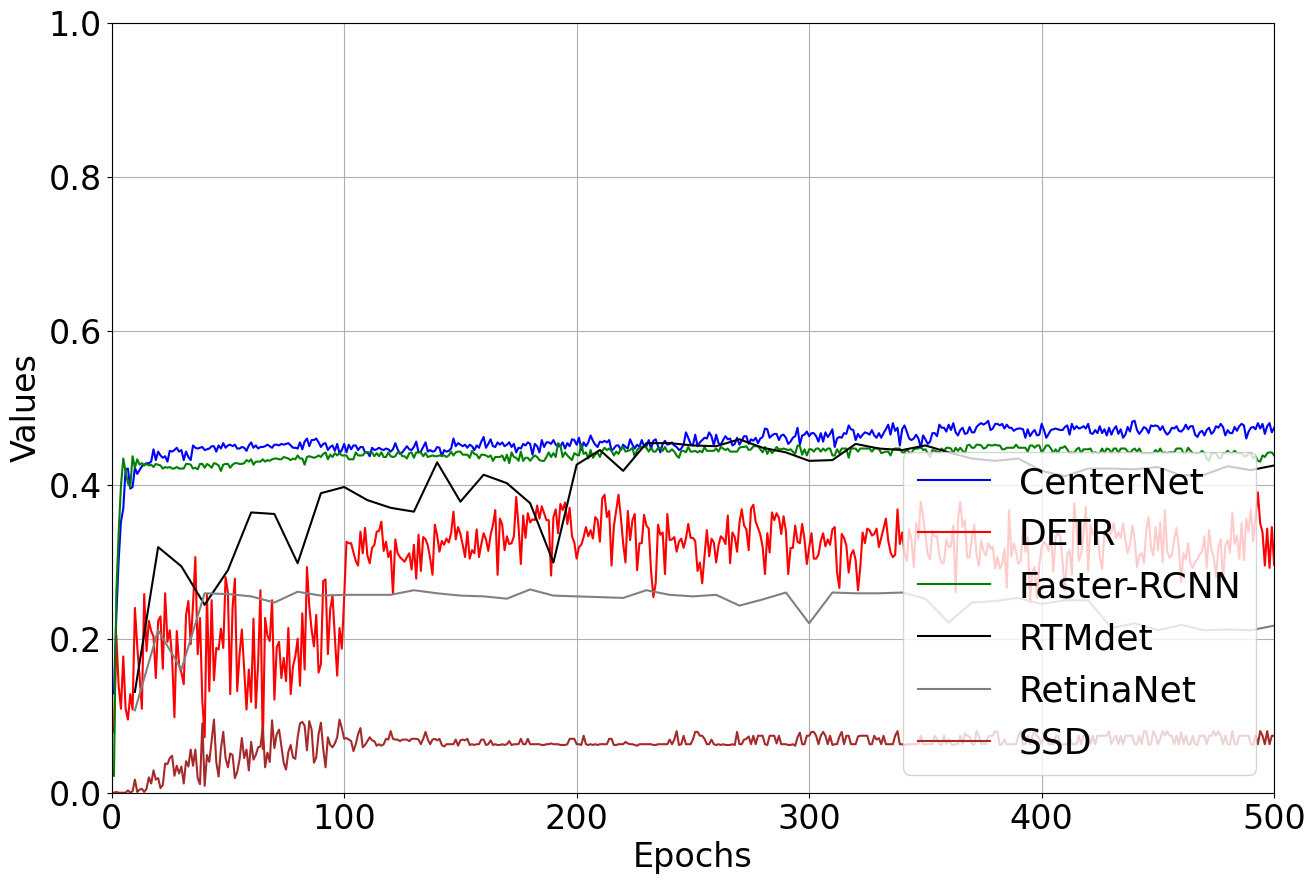

In [4]:
directory = 'curve_results/bbox_mAP_m'
plot_curves(directory, separate_subplots=False)

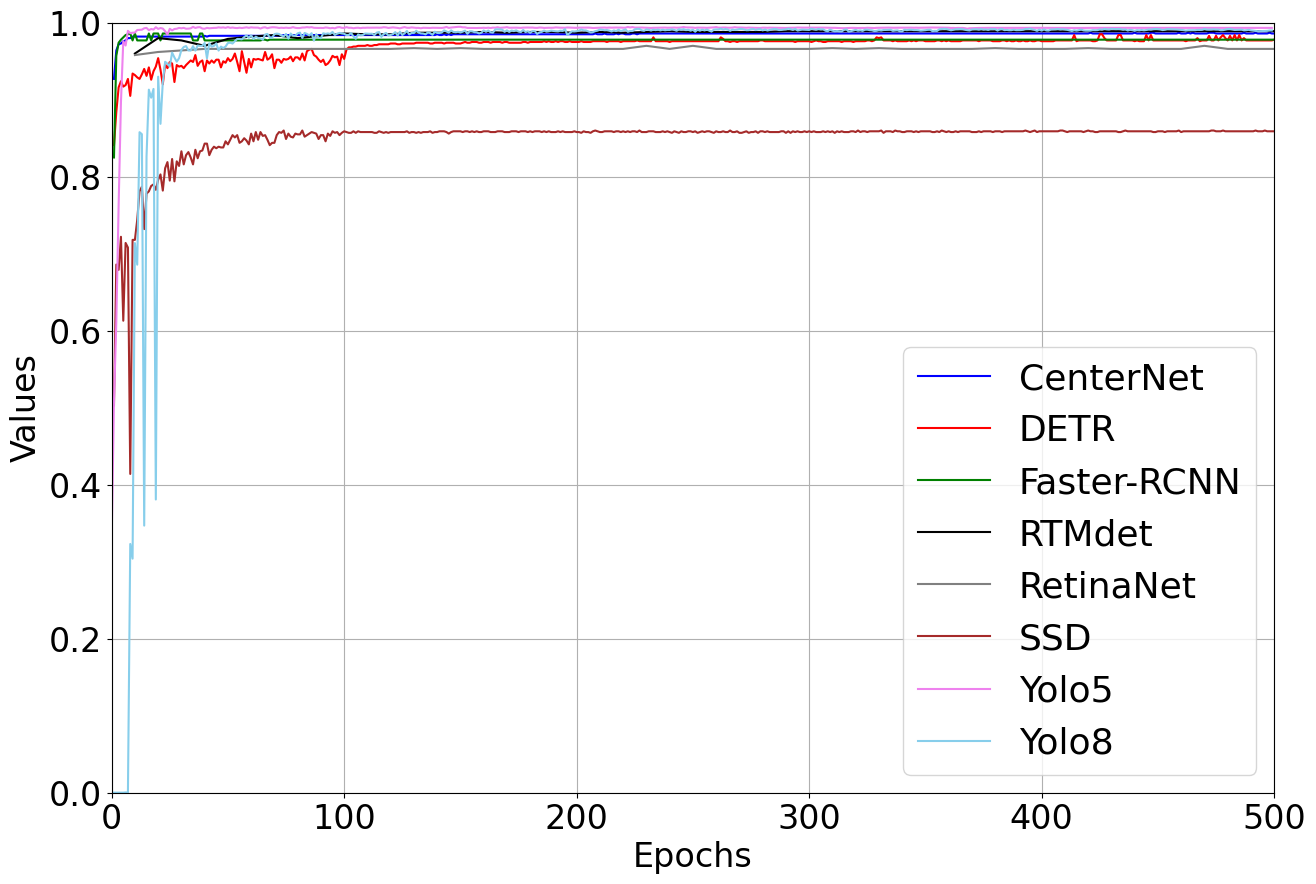

In [5]:
directory = 'curve_results/bbox_mAP50'
plot_curves(directory, separate_subplots=False)

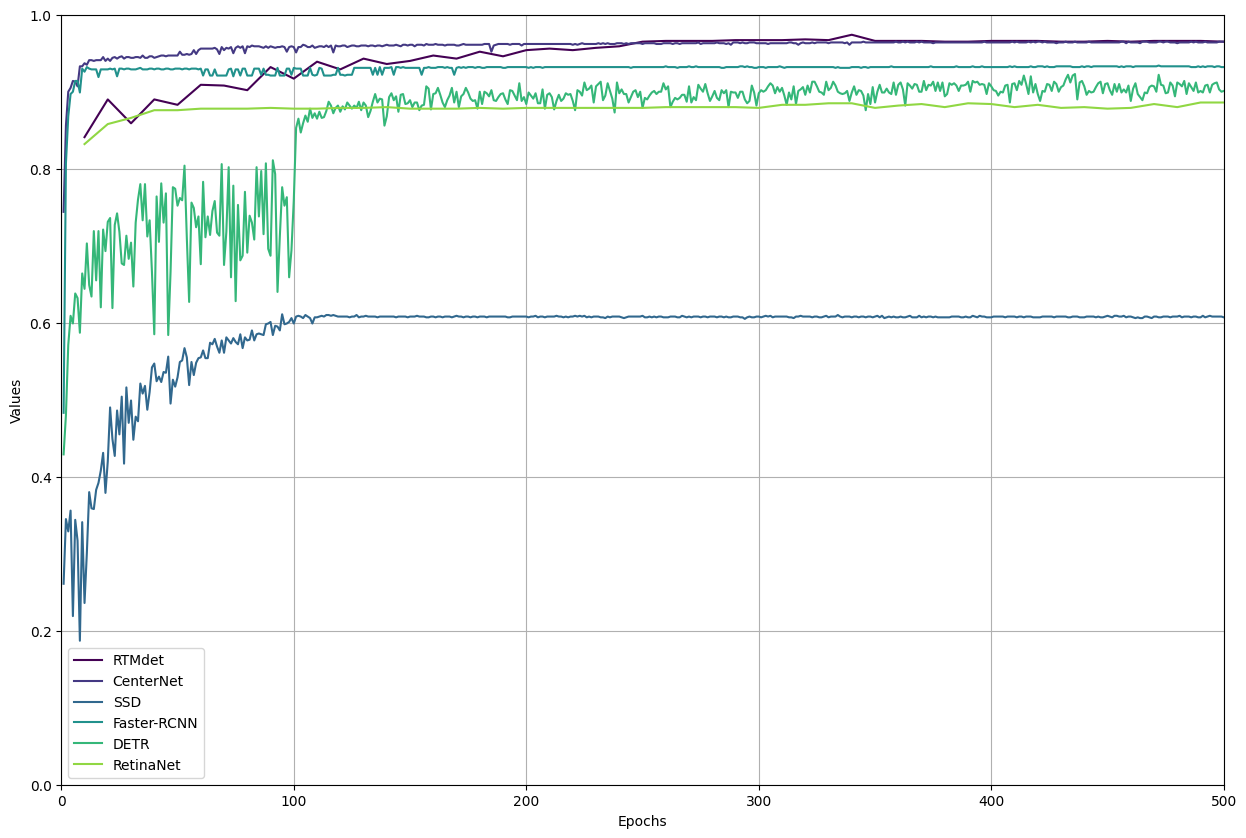

In [8]:
directory = 'curve_results/bbox_mAP75'
plot_curves(directory, separate_subplots=False)

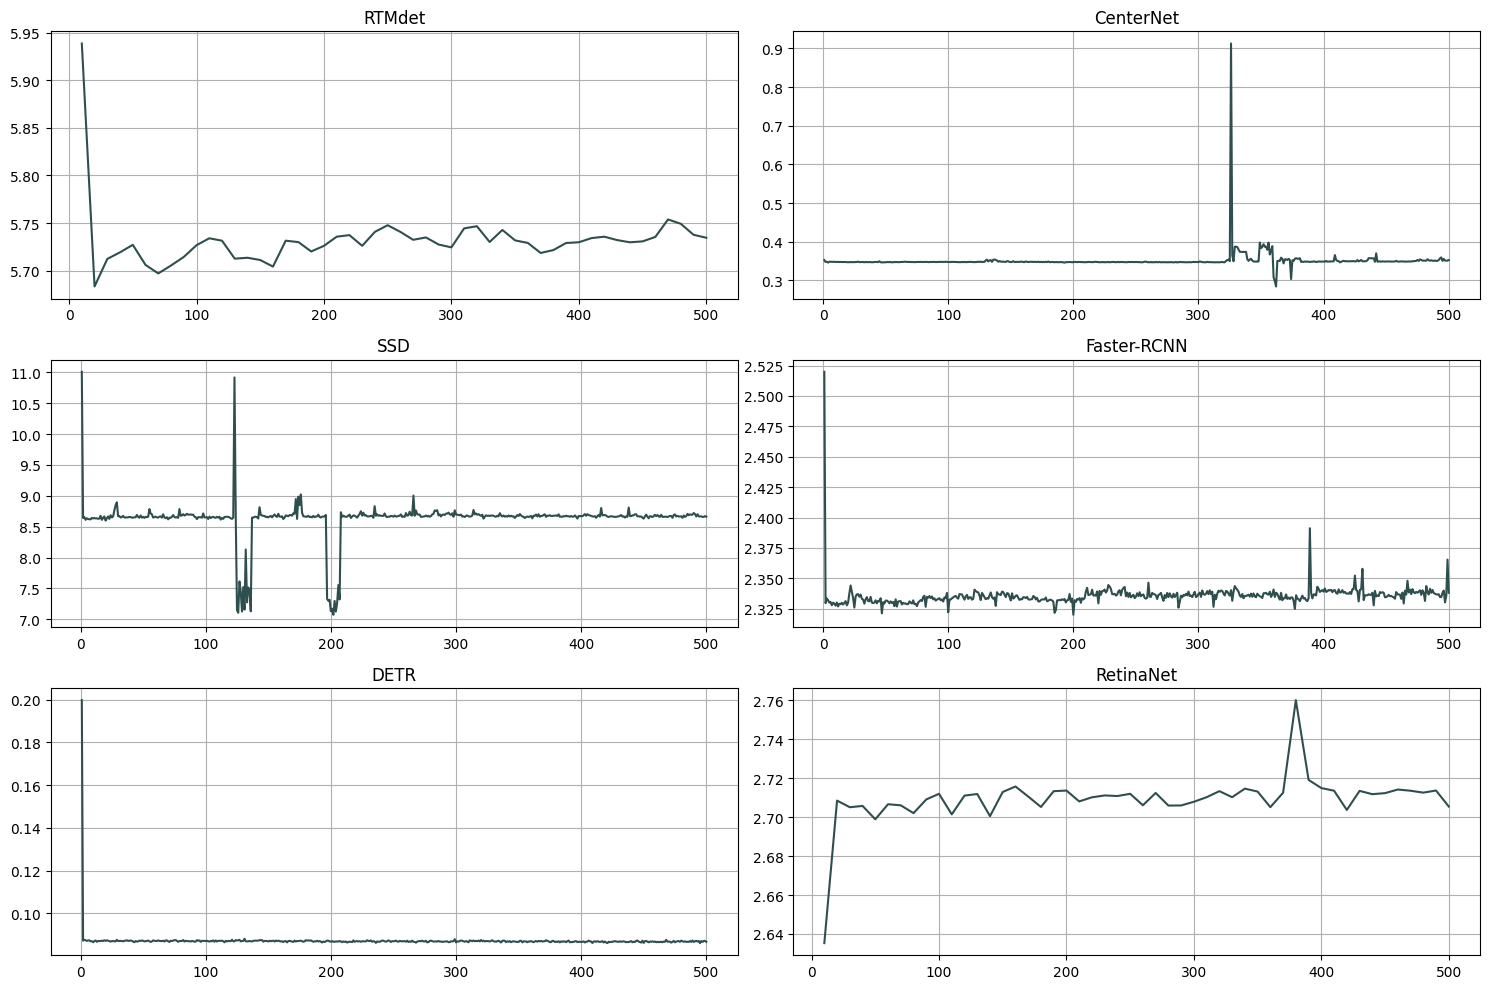

In [7]:
directory = 'curve_results/data_time'
plot_curves(directory, color='darkslategray')

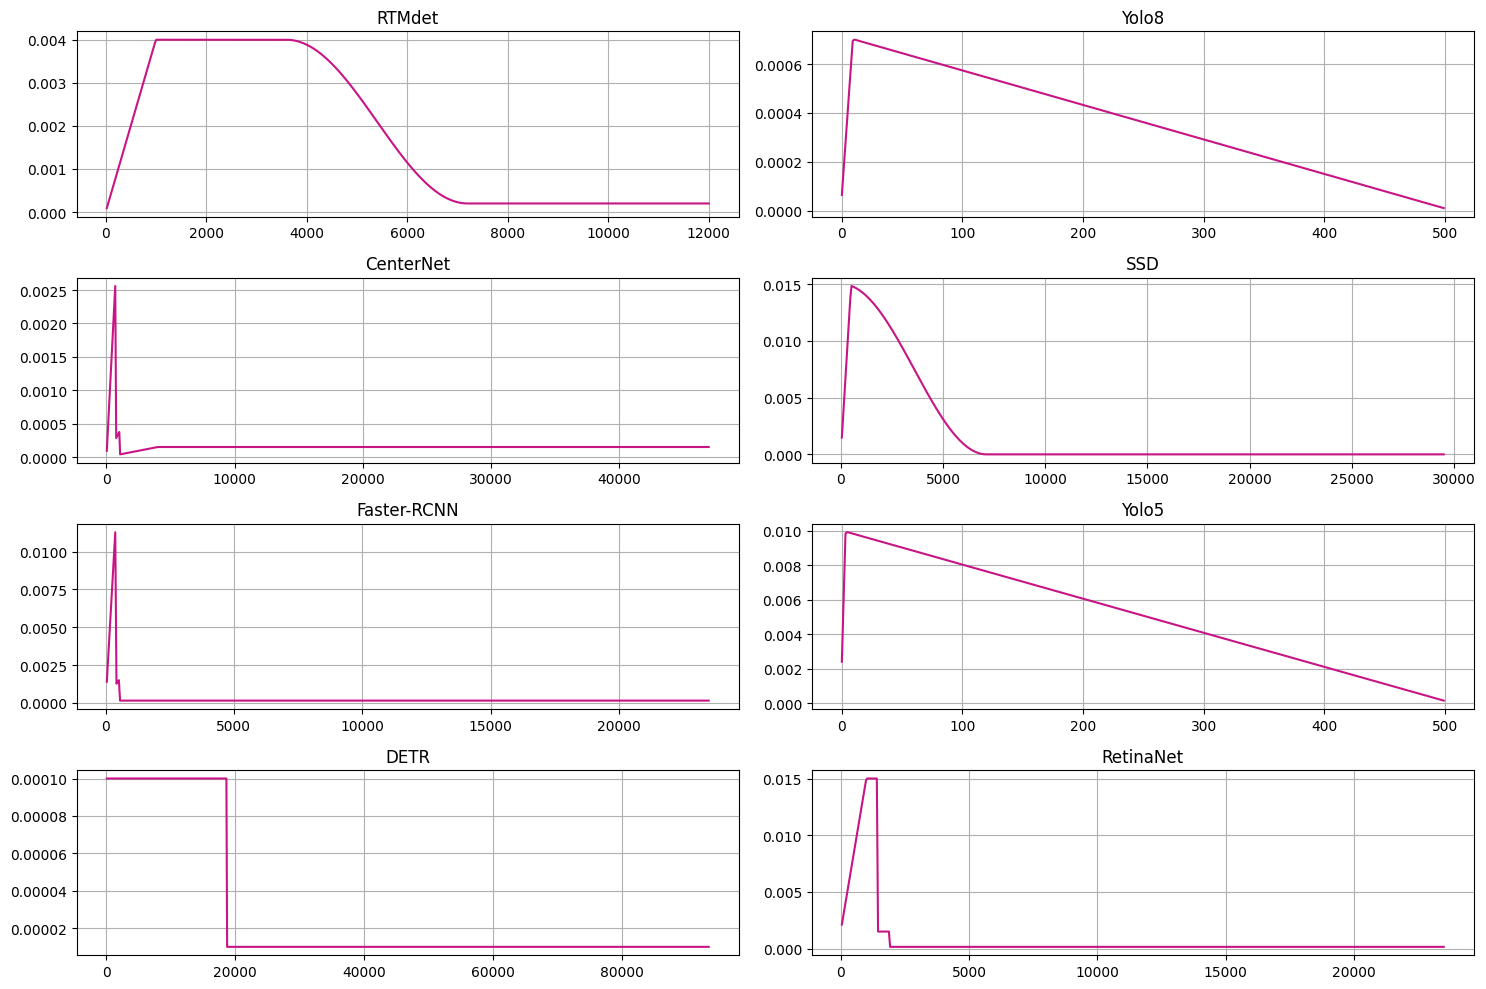

In [9]:
directory = 'curve_results/lr'
plot_curves(directory, color='mediumvioletred')

Best loss for subplot 1: 0.1961094141006469
Best loss for subplot 2: 0.1173737347126007
Best loss for subplot 3: 0.7414489984512329
Best loss for subplot 4: 0.1431415826082229
Best loss for subplot 5: 0.2004915326833725
Best loss for subplot 6: 0.1218846663832664
Best loss for subplot 7: 0.0097655477002263
Best loss for subplot 8: 0.2904399931430816


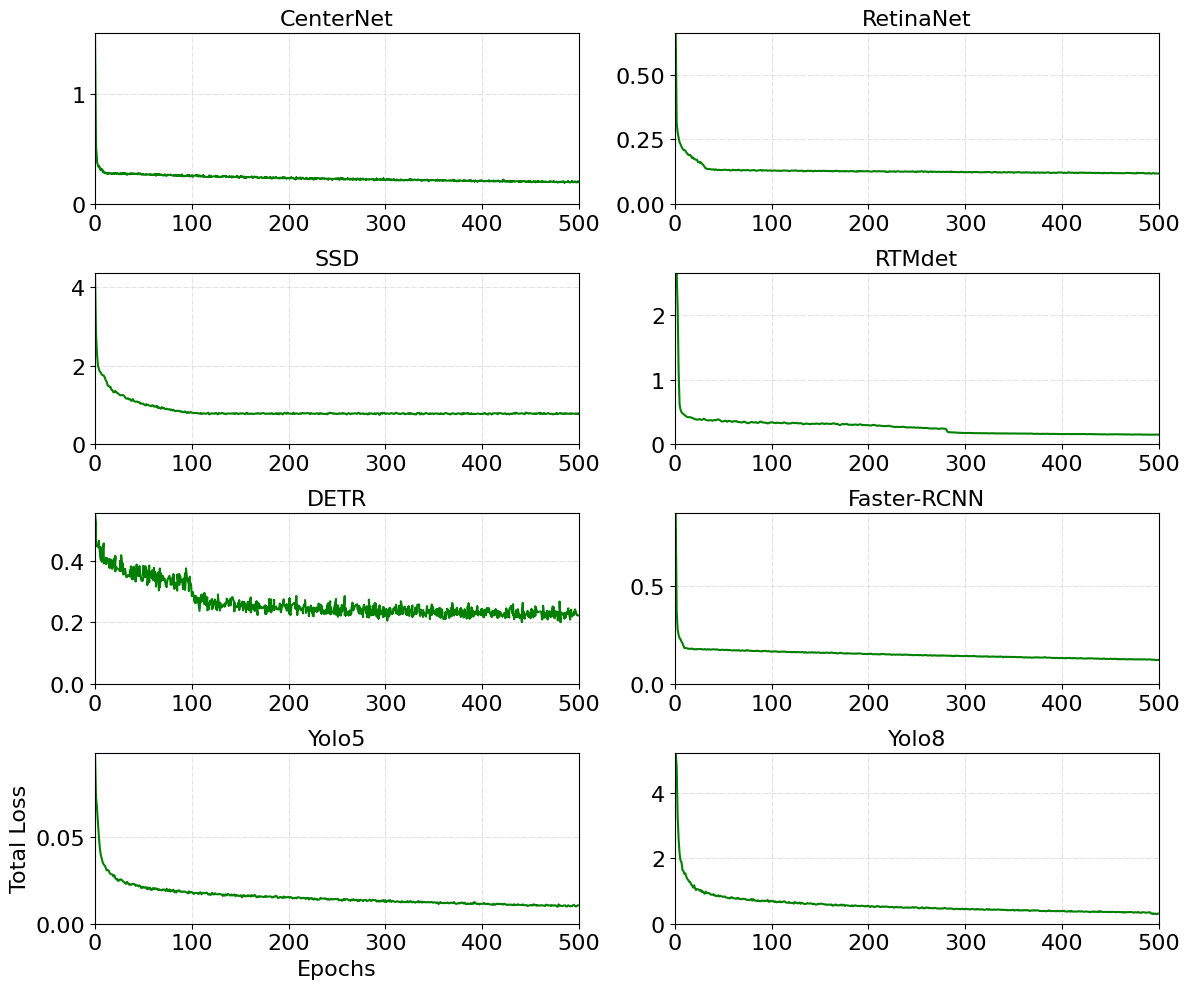

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_loss_curve(ax, csv_path, batch_size, total_samples=2120, plot_color='green'):
    df = pd.read_csv(csv_path)

    if 'Step' in df.columns:
        df.rename(columns={'Step': 'iteration'}, inplace=True)

    if 'iteration' in df.columns:
        if batch_size is not None:
            total_iterations_per_epoch = total_samples // batch_size
            df['Epoch'] = (df['iteration'] / total_iterations_per_epoch).astype(int)
        else:
            df['Epoch'] = df['iteration']

    ax.plot(df['Epoch'], df['Value'], color=plot_color)  
    ax.set_title(csv_path.split('/')[-1].split('.')[0], fontsize=16)

    ax.tick_params(axis='both', which='major', labelsize=16)
    return df['Value'].max(), df['Value'].min()

fig, axs = plt.subplots(4, 2, figsize=(12, 10))

models = [
    ("/home/safouane/Downloads/FlightScope_Bench/curve_results/loss/CenterNet.csv", 23),
    ("/home/safouane/Downloads/FlightScope_Bench/curve_results/loss/RetinaNet.csv", 45),
    ("/home/safouane/Downloads/FlightScope_Bench/curve_results/loss/SSD.csv", 36),
    ("/home/safouane/Downloads/FlightScope_Bench/curve_results/loss/RTMdet.csv", 86),
    ("/home/safouane/Downloads/FlightScope_Bench/curve_results/loss/DETR.csv", 11.3),
    ("/home/safouane/Downloads/FlightScope_Bench/curve_results/loss/Faster-RCNN.csv", 45),
    ("/home/safouane/Downloads/FlightScope_Bench/curve_results/loss/Yolo5.csv", None),  # None for batch_size
    ("/home/safouane/Downloads/FlightScope_Bench/curve_results/loss/Yolo8.csv", None)   # None for batch_size
]

best_losses = []

for i, (csv_path, batch_size) in enumerate(models):
    row, col = divmod(i, 2)
    max_value, best_loss = plot_loss_curve(axs[row, col], csv_path, batch_size)
    axs[row, col].set_ylim(0, max_value)
    axs[row, col].set_xlim(0, 500)

    axs[row, col].grid(color='lightgray', linestyle='-.', linewidth=0.5)

    best_losses.append(best_loss)

axs[-1, 0].set_xlabel("Epochs", fontsize=16)
axs[-1, 0].set_ylabel("Total Loss", fontsize=16)

plt.tight_layout()
plt.xlim(0, 500)

for i, best_loss in enumerate(best_losses):
    print(f"Best loss for subplot {i+1}: {best_loss}")

plt.show()


Best loss for subplot 1: 0.1961094141006469
Best loss for subplot 2: 0.1173737347126007
Best loss for subplot 3: 0.7414489984512329
Best loss for subplot 4: 0.1431415826082229
Best loss for subplot 5: 0.2004915326833725
Best loss for subplot 6: 0.1218846663832664
Best loss for subplot 7: 0.0097655477002263
Best loss for subplot 8: 0.2904399931430816


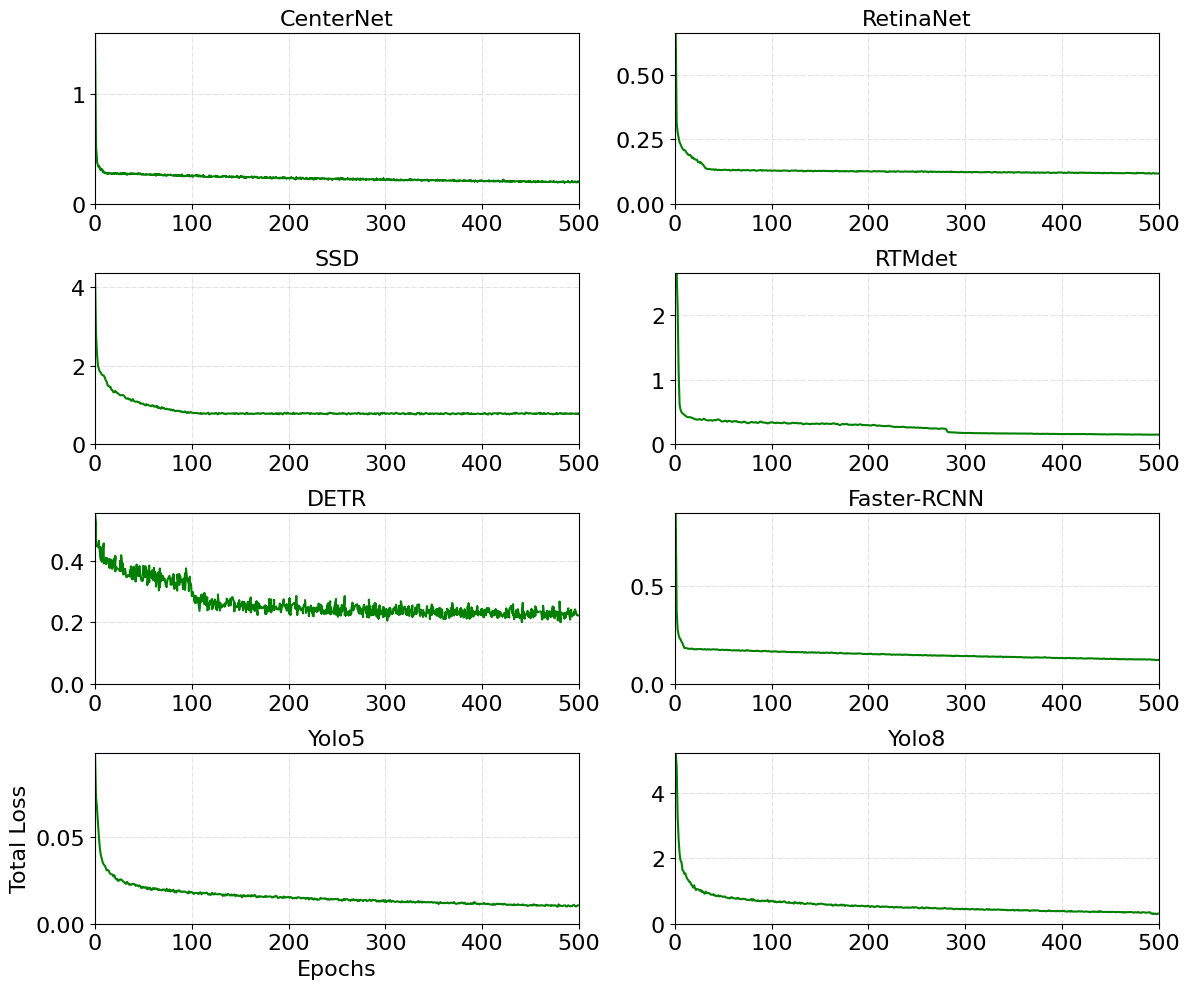

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_loss_curve(ax, csv_path, batch_size, total_samples=2120):
    # Load the CSV file
    df = pd.read_csv(csv_path)

    # Check if 'Step' column is present and rename it to 'iteration'
    if 'Step' in df.columns:
        df.rename(columns={'Step': 'iteration'}, inplace=True)

    # If 'iteration' column is present, convert it to epoch
    if 'iteration' in df.columns:
        if batch_size is not None:
            total_iterations_per_epoch = total_samples // batch_size
            df['Epoch'] = (df['iteration'] / total_iterations_per_epoch).astype(int)
        else:
            df['Epoch'] = df['iteration']

    # Plot the loss curve on the given subplot axis
    ax.plot(df['Epoch'], df['Value'])  # Assuming 'Value' column contains the loss values
    ax.set_title(csv_path.split('/')[-1].split('.')[0], fontsize=16)  # Extract the model name for the title and increase fontsize

    # Increase the font size of xticks and yticks
    ax.tick_params(axis='both', which='major', labelsize=16)

    # Return the maximum value for ylim and the best (lowest) loss value
    return df['Value'].max(), df['Value'].min()

# Create a 4x2 subplot layout
fig, axs = plt.subplots(4, 2, figsize=(12, 10))

# Example usage for multiple models
models = [
    ("/home/safouane/Downloads/FlightScope_Bench/curve_results/loss_bbox/CenterNet.csv", 23),
    ("/home/safouane/Downloads/FlightScope_Bench/curve_results/loss_bbox/RetinaNet.csv", 45),
    ("/home/safouane/Downloads/FlightScope_Bench/curve_results/loss_bbox/SSD.csv", 36),
    ("/home/safouane/Downloads/FlightScope_Bench/curve_results/loss_bbox/RTMdet.csv", 86),
    ("/home/safouane/Downloads/FlightScope_Bench/curve_results/loss_bbox/DETR.csv", 11.3),
    ("/home/safouane/Downloads/FlightScope_Bench/curve_results/loss_bbox/Faster-RCNN.csv", 45),
    ("/home/safouane/Downloads/FlightScope_Bench/curve_results/loss_bbox/Yolo5.csv", None),  # None for batch_size
    ("/home/safouane/Downloads/FlightScope_Bench/curve_results/loss_bbox/Yolo8.csv", None)   # None for batch_size
]

# Lists to store the best (lowest) loss values for each subplot
best_losses = []

# Iterate through models and plot on subplots
for i, (csv_path, batch_size) in enumerate(models):
    row, col = divmod(i, 2)
    max_value, best_loss = plot_loss_curve(axs[row, col], csv_path, batch_size)
    axs[row, col].set_ylim(0, max_value)
    axs[row, col].set_xlim(0, 500)

    # Add customized grid lines
    axs[row, col].grid(color='lightgray', linestyle='-.', linewidth=0.5)

    # Store the best (lowest) loss value
    best_losses.append(best_loss)

# Adjust layout to prevent clipping of titles
plt.tight_layout()
plt.xlim(0, 500)

# Print the best (lowest) loss values for each subplot
for i, best_loss in enumerate(best_losses):
    print(f"Best loss for subplot {i+1}: {best_loss}")

plt.show()
